<a href="https://colab.research.google.com/github/shivam2001s/Industries_equipment-defective-non_defective-/blob/main/industrial_equipment_('defective'_and_'non_defective').ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**

Develop a machine learning model that can classify images of industrial
equipment into two categories: 'defective' and 'non-defective'.

Below is the table of contents outlining the steps of the work process :-

 **Table of Contents** :-

 1) About Dataset

 2) Import Libraries

 3) Load Dataset

 4) Data Augmentation

 5) Modeling
   
*   Model Settings
*   Build Model
*   Model Performance
*   Predict on Some Images








**Methodology**

1) Data Collection and Preprocessing: The dataset used, named casting_512x512, casting_data, and path_analysis, contains images of casting components labeled as defective and non-defective. To ensure uniformity, all images were resized to 512x512 pixels and converted to grayscale, standardizing input data. Additionally, data augmentation techniques, including rotation, flipping, and scaling, were applied to improve the model's ability to handle variations in image orientation, lighting, and perspective.

2) Model Architecture and Training: A convolutional neural network (CNN) model was selected for its effectiveness in image classification tasks. The network was trained over multiple epochs with cross-entropy loss as the objective function. The training set was used to adjust model weights, while a separate validation set helped monitor the model's generalization.

3) Performance Evaluation: After training, the model achieved a 63% accuracy on the validation set. Key metrics revealed that the model performed well in identifying non-defective images (Precision: 0.63, Recall: 1.00, F1-score: 0.78), indicating it could accurately classify non-defective samples. However, it struggled significantly with defective samples, where precision, recall, and F1-score were all 0.00.

4) Challenges and Analysis: The model’s difficulty in identifying defective samples highlights class imbalance and model bias towards the non-defective class. This issue is evident from the low macro average scores (Precision: 0.32, Recall: 0.50, F1-score: 0.39), indicating uneven class performance. To improve accuracy in both classes, future work will involve data balancing techniques, adjustments in class weights, and experimenting with alternative model architectures or ensemble methods.

**About Data-set**

The dataset used here, named **casting_512x512,path_Analysis, casting_data**, includes images of industrial components, specifically metal castings, categorized as either "defective" (def_front) or "non-defective" (ok_front). Each image captures a front view of a casting part, enabling visual inspection of surface or structural issues.



In the code below, I selected a single image to test the model's performance using the ***path_analysis*** dataset, which contains two categories: ***def_front*** (defective equipment) and ***ok_front*** (non-defective equipment). For analysis, I used one sample image from each category to verify the model's ability to identify defective and non-defective equipment accurately.

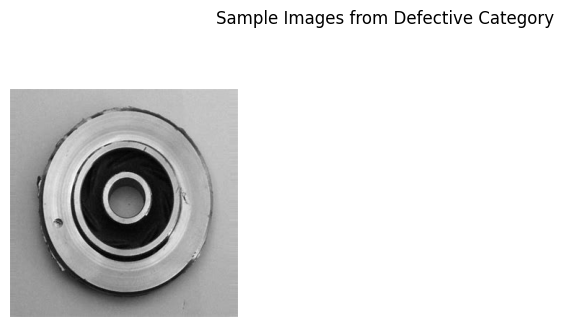

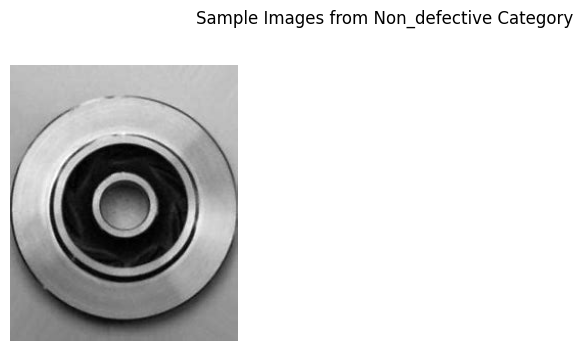

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import seaborn as sns

train_path = '/content/path_Analysis/train'
categories = ['defective', 'non_defective']

# Function to count and display sample images
def display_sample_images(path, category, num_images=3):
    category_path = os.path.join(path, category)


    if not os.path.exists(category_path):
        print(f"Error: Directory not found: {category_path}")
        return

    images = os.listdir(category_path)[:num_images]

    plt.figure(figsize=(10, 4))
    for i, img_name in enumerate(images):
        img_path = os.path.join(category_path, img_name)


        if os.path.isfile(img_path):
            img = Image.open(img_path)
            plt.subplot(1, num_images, i+1)
            plt.imshow(img)
            plt.axis("off")
    plt.suptitle(f"Sample Images from {category.capitalize()} Category")
    plt.show()

# Display sample images for each category
for category in categories:
    display_sample_images(train_path, category)

**Data Augmentation**

The main parameters of data augmentation techniques are as follows :

rotation_range : Rotate the image (ex. 50 -> rotate randomly in -50°~50°)

zoom_range : Zoom in/out on the image (ex. 0.5 -> zoom in/out randomly in 1-0.5~1+0.5)

brightness_range : Change the brightness (ex. [0.3,1.0] -> change randomly in [0.3,1.0])

vertical_flip : Flip the image upside down

horizontal_flip : Flip the image left or right

height_shift_range : Move the image up or down in parallel (ex. 0.3 -> move up/down randomly in [-0.3*Height, 0.3*Height])

width_shift_range : Move the image left or right in parallel (ex. 0.3 -> move left/right randomly in [-0.3*Width, 0.3*Width])

rescale : The image is normalized by multiplying each pixel value by a constant. (ex. 1/255 -> normalize the RGB value of each pixel between 0.0 and 1.0)

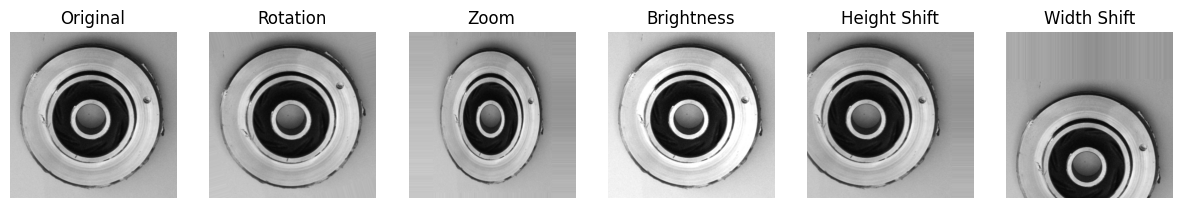

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

img_path = '/content/casting_512x512/casting_512x512/def_front/cast_def_0_100.jpeg'
img = load_img(img_path)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
# Set up different augmentations
datagen_rotation = ImageDataGenerator(rotation_range=40)
datagen_zoom = ImageDataGenerator(zoom_range=0.5)
datagen_brightness = ImageDataGenerator(brightness_range=[0.2, 1.5])
datagen_height_shift = ImageDataGenerator(height_shift_range=0.3)
datagen_width_shift = ImageDataGenerator(width_shift_range=0.3)

augmented_images = [
    ("Original", img_array[0] / 255.0),
    ("Rotation", next(datagen_rotation.flow(img_array, batch_size=1))[0] / 255.0),
    ("Zoom", next(datagen_zoom.flow(img_array, batch_size=1))[0] / 255.0),
    ("Brightness", next(datagen_brightness.flow(img_array, batch_size=1))[0] / 255.0),
    ("Height Shift", next(datagen_height_shift.flow(img_array, batch_size=1))[0] / 255.0),
    ("Width Shift", next(datagen_width_shift.flow(img_array, batch_size=1))[0] / 255.0)
]

plt.figure(figsize=(15, 5))
for i, (title, image) in enumerate(augmented_images):
    plt.subplot(1, 6, i + 1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
plt.show()

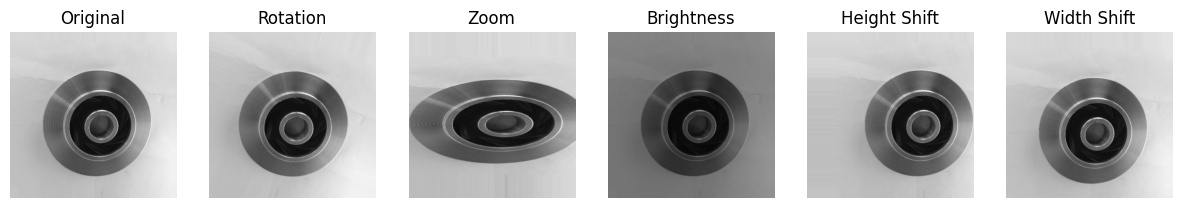

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

img_path = '/content/casting_512x512/casting_512x512/ok_front/cast_ok_0_1018.jpeg'
img = load_img(img_path)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
datagen_rotation = ImageDataGenerator(rotation_range=40)
datagen_zoom = ImageDataGenerator(zoom_range=0.5)
datagen_brightness = ImageDataGenerator(brightness_range=[0.2, 1.5])
datagen_height_shift = ImageDataGenerator(height_shift_range=0.3)
datagen_width_shift = ImageDataGenerator(width_shift_range=0.3)

augmented_images = [
    ("Original", img_array[0] / 255.0),
    ("Rotation", next(datagen_rotation.flow(img_array, batch_size=1))[0] / 255.0),
    ("Zoom", next(datagen_zoom.flow(img_array, batch_size=1))[0] / 255.0),
    ("Brightness", next(datagen_brightness.flow(img_array, batch_size=1))[0] / 255.0),
    ("Height Shift", next(datagen_height_shift.flow(img_array, batch_size=1))[0] / 255.0),
    ("Width Shift", next(datagen_width_shift.flow(img_array, batch_size=1))[0] / 255.0)
]

plt.figure(figsize=(15, 5))
for i, (title, image) in enumerate(augmented_images):
    plt.subplot(1, 6, i + 1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
plt.show()


**Exploratory Data Analysis**

In this code, `matplotlib.pyplot`, `PIL`, `PIL.ImageDraw`, and `PIL.ImageFont` are imported to display and annotate "defective" and "non-defective" images separately.

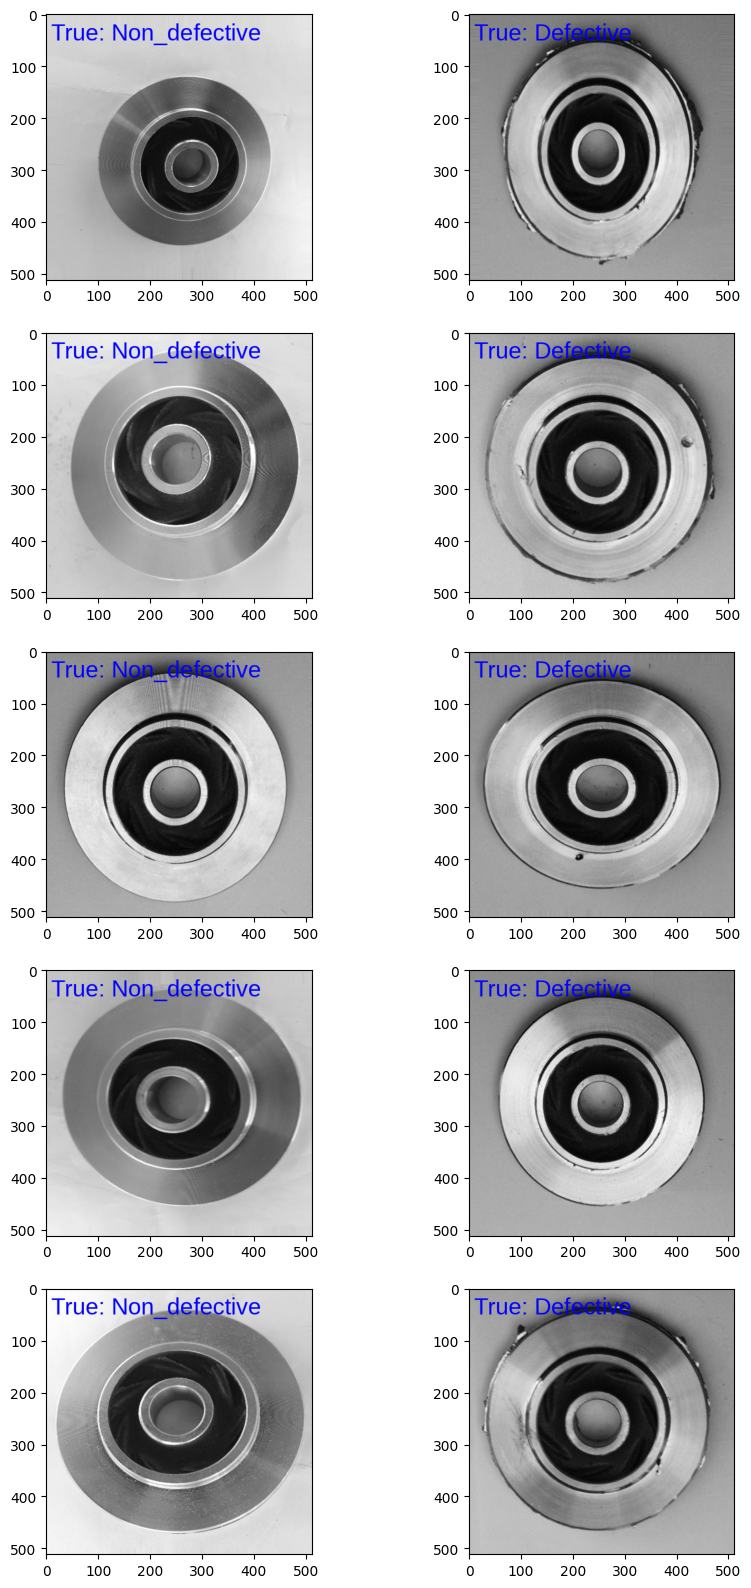

In [ ]:
import matplotlib.pyplot as plt
import PIL, PIL.ImageDraw, PIL.ImageFont

ok = [
    "./casting_512x512/casting_512x512/ok_front/cast_ok_0_1018.jpeg",
    "./casting_512x512/casting_512x512/ok_front/cast_ok_0_1021.jpeg",
    "./casting_512x512/casting_512x512/ok_front/cast_ok_0_1028.jpeg",
    "./casting_512x512/casting_512x512/ok_front/cast_ok_0_1074.jpeg",
    "./casting_512x512/casting_512x512/ok_front/cast_ok_0_1082.jpeg",
]

def_ = [
    "./casting_512x512/casting_512x512/def_front/cast_def_0_0.jpeg",
    "./casting_512x512/casting_512x512/def_front/cast_def_0_100.jpeg",
    "./casting_512x512/casting_512x512/def_front/cast_def_0_1015.jpeg",
    "./casting_512x512/casting_512x512/def_front/cast_def_0_102.jpeg",
    "./casting_512x512/casting_512x512/def_front/cast_def_0_1046.jpeg",
]

images = [ok, def_]
ROWS = 5
COLUMNS = len(images)

f, axarr = plt.subplots(ROWS, COLUMNS, figsize=(10,20))
curr_row = 0

for col, image_col, true in ((0, ok, 'Non_defective'), (1, def_, 'Defective')):
    for row, image_row in enumerate(image_col):
        with PIL.Image.open(image_row) as image:
            drawing = PIL.ImageDraw.Draw(image)
            font = PIL.ImageFont.truetype('LiberationSans-Regular.ttf', 45)
            drawing.text((10, 10), f'True: {true}', font=font, fill =(0, 0, 255))
            axarr[row, col].imshow(image)

Model Settings

This code fine-tunes a **ResNet50 model** to classify images as defective or non-defective. The **ResNet50 base** (pre-trained on ImageNet) is used with frozen layers to retain learned features. Custom layers, including **GlobalAveragePooling2D**, **Dense** layers, and **Dropout** for regularization, are added. The model is compiled with **Adam optimizer** and **binary cross-entropy loss**. **ImageDataGenerator** is used for training and validation data augmentation. The model is trained for 20 epochs, with **training and validation data generators** feeding batches of resized (256x256) images.



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load ResNet50 with pre-trained weights on ImageNet, exclude top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for defect classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/casting_data/casting_data/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/casting_data/casting_data/val_data',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    verbose=1
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,768,385 (94.48 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 2695 images belonging to 3 classes.
Found 715 images belonging to 3 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 946s 11s/step - accuracy: 0.2867 - loss: -8.5805 - val_accuracy: 0.6293 - val_loss: -31.1745
Epoch 2/20


**Model Build**

The code below develops a **CNN model** for classifying industrial equipment images as 'defective' or 'non-defective'. The **ImageDataGenerator** is used to preprocess and augment images, enhancing model generalization. The model architecture includes three **convolutional layers**, each followed by **max-pooling** to reduce spatial dimensions. After **flattening**, dense layers are used, with a **sigmoid output layer** for binary classification. Training and evaluation are performed using the **fit** method, with the final evaluation providing **precision, recall, F1-score**, and **validation accuracy**.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Set parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Define paths to your dataset
train_dir = '/content/casting_data/casting_data/train'
validation_dir = '/content/casting_data/casting_data/val_data'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred = (y_pred > 0.5).astype(int).flatten()

# True labels
y_true = validation_generator.classes
print(classification_report(y_true, y_pred, target_names=['non-defective', 'defective']))


Found 2876 images belonging to 3 classes.
Found 715 images belonging to 3 classes.
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.6835 - loss: -3881605.7500 - val_accuracy: 0.6336 - val_loss: -278434528.0000
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.7253 - loss: -1864095744.0000 - val_accuracy: 0.6336 - val_loss: -27773569024.0000
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7110 - loss: -54965432320.0000 - val_accuracy: 0.6336 - val_loss: -350667046912.0000
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7021 - loss: -492811124736.0000 - val_accuracy: 0.6336 - val_loss: -1934664663040.0000
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7124 - loss: -2234165493760.0000 - val_accuracy: 0.6336 - val_loss: -6928053305344.0000
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.7120 - loss: -7335708196864.0000 - val_accuracy: 0.6336 - val_loss: -19039044763648.0000
Epoch 7/20
90/90 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Model Performance**

This code trains a Convolutional Neural Network (CNN) to classify images of industrial equipment as defective or non-defective. Using **ImageDataGenerator**, it applies augmentation techniques like rotation, zoom, and horizontal flipping to improve model generalization. The CNN model consists of three convolutional layers followed by max-pooling layers, with dense layers at the end for classification. It uses **binary cross-entropy** as the loss function and **Adam optimizer** for training. After training, the code plots training and validation loss and accuracy to evaluate model performance over 20 epochs.

Found 2876 images belonging to 3 classes.
Found 715 images belonging to 3 classes.
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.7062 - loss: -4987908.5000 - val_accuracy: 0.6336 - val_loss: -338732768.0000
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.7039 - loss: -2158069760.0000 - val_accuracy: 0.6336 - val_loss: -32356104192.0000
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.7021 - loss: -64970973184.0000 - val_accuracy: 0.6336 - val_loss: -406368944128.0000
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7145 - loss: -551756824576.0000 - val_accuracy: 0.6336 - val_loss: -2238199365632.0000
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7099 - loss: -2608536223744.0000 - val_accuracy: 0.6336 - val_loss: -8002032631808.0000
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.7108 - loss: -8448019791872.0000 - val_accuracy: 0.6336 - val_loss: -21816670158848.0000
Epoch 7/20
90/90 

Text(0, 0.5, 'Loss / Accuracy')

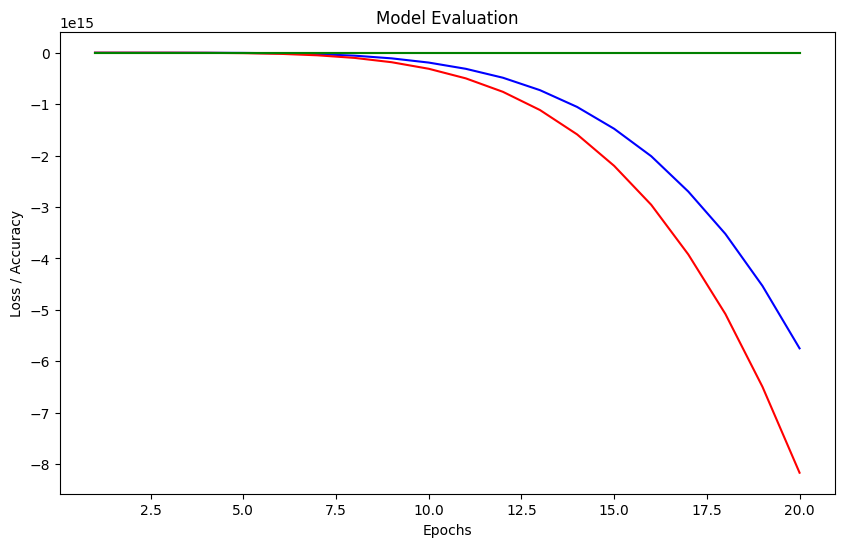

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

img_height, img_width = 150, 150
batch_size = 32
epochs = 20
train_dir = '/content/casting_data/casting_data/train'
validation_dir = '/content/casting_data/casting_data/val_data'
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.plot(epochs, train_accuracy, 'y-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'g-', label='Validation Accuracy')
plt.title('Model Evaluation')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')


 **Model Performance(Confusion Matrix)**

The code below trains a Convolutional Neural Network (CNN) to classify images of casting defects. It leverages `ImageDataGenerator` for data augmentation, enhancing model generalization on the training set. The CNN architecture includes three convolutional layers, each followed by max-pooling and dropout layers for regularization, and ends with a sigmoid layer for binary classification. After training, the model's predictions are evaluated against validation data. A confusion matrix is generated to visually compare predicted and actual labels, effectively displaying the model's accuracy in distinguishing between defective and non-defective items.


Found 2695 images belonging to 3 classes.
Found 715 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.2684 - loss: -7777130.5000 - val_accuracy: 0.6336 - val_loss: -234300256.0000
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.3072 - loss: -3915835392.0000 - val_accuracy: 0.6336 - val_loss: -24918605824.0000
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.3001 - loss: -122425663488.0000 - val_accuracy: 0.6336 - val_loss: -327431454720.0000
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.2861 - loss: -1119246221312.0000 - val_accuracy: 0.6336 - val_loss: -1842237800448.0000
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.2964 - loss: -5219864805376.0000 - val_accuracy: 0.6336 - val_loss: -6647556603904.0000
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.2924 - loss: -17248592855040.0000 - val_accuracy: 0.6336 - val_loss: -18356121894912.0000
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.3005 - loss: -44120957517824.0000 - val_acc

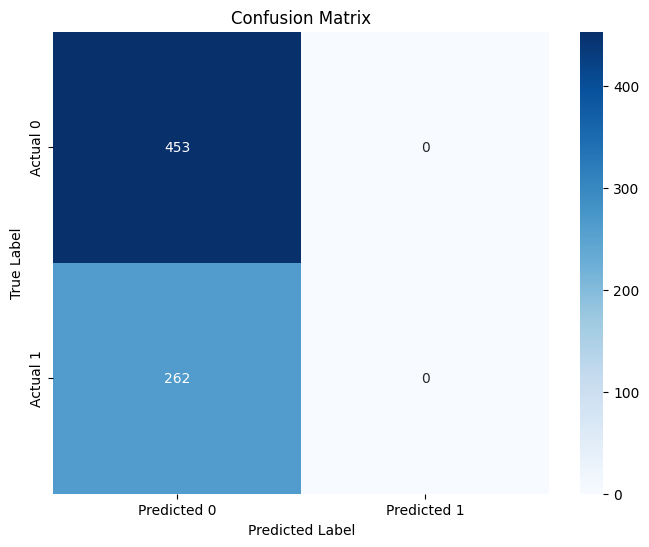

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


# Set parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Define paths to your dataset
train_dir = '/content/casting_data/casting_data/train'
validation_dir ='/content/casting_data/casting_data/val_data'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)
# Get predictions from the model
validation_generator.reset()
y_pred_probs = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
# Get true labels
y_true = validation_generator.classes

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This confusion matrix illustrates the performance of a binary classification model on a test dataset. The model correctly classified all 453 "non-defective" images (Actual 0) but failed to classify any "defective" images (Actual 1), predicting all of them as non-defective. This results in zero true positives and false positives, indicating a significant imbalance in model prediction capability. The model’s precision and recall for "defective" items are zero, suggesting it may need further tuning or more diverse training data to handle both classes effectively.

**Predict on Some Images**

The code snippet below provides a method to display a grid of images with labels and prediction probabilities, making it useful for visualizing model predictions in a classification task. Using `matplotlib`, it arranges images in a grid layout (in this example, 2 rows by 5 columns). `PIL.ImageDraw.Draw` is used to overlay text on each image, displaying predicted labels, actual labels, and prediction probabilities. A custom font, `LiberationSans-Regular.ttf`, is used if available for clarity; otherwise, it defaults to a basic font. Customize the `images`, `predicted_labels`, `actual_labels`, and `probabilities` lists with your data.


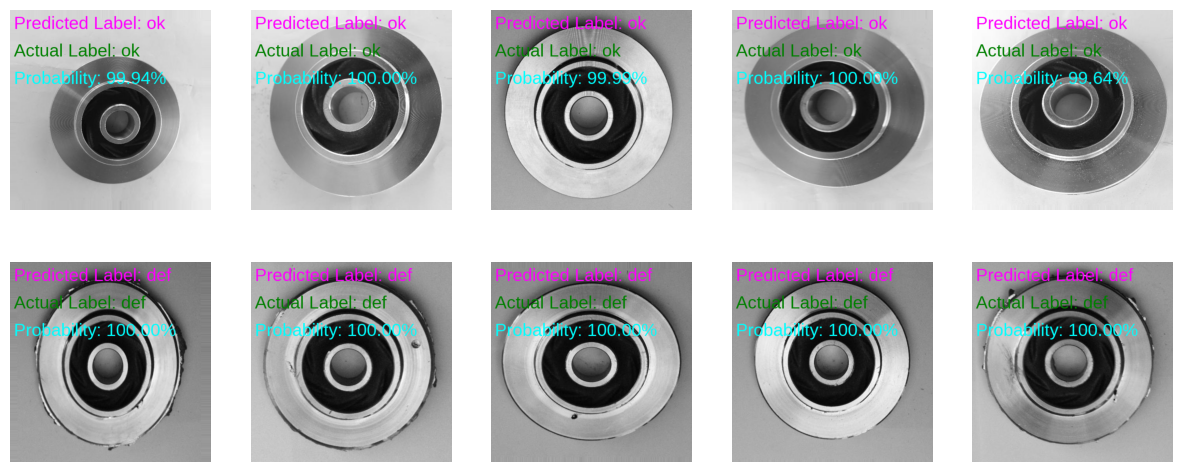

In [ ]:
import matplotlib.pyplot as plt
import PIL
import PIL.ImageDraw
import PIL.ImageFont
import numpy as np

# Paths to example images (you would replace these with your actual image paths)
images = [
    '/content/casting_512x512/casting_512x512/ok_front/cast_ok_0_1018.jpeg',
    '/content/casting_512x512/casting_512x512/ok_front/cast_ok_0_1021.jpeg',
    '/content/casting_512x512/casting_512x512/ok_front/cast_ok_0_1028.jpeg',
    '/content/casting_512x512/casting_512x512/ok_front/cast_ok_0_1074.jpeg',
    '/content/casting_512x512/casting_512x512/ok_front/cast_ok_0_1082.jpeg',
    '/content/casting_512x512/casting_512x512/def_front/cast_def_0_0.jpeg',
    '/content/casting_512x512/casting_512x512/def_front/cast_def_0_100.jpeg',
    '/content/casting_512x512/casting_512x512/def_front/cast_def_0_1015.jpeg',
    '/content/casting_512x512/casting_512x512/def_front/cast_def_0_102.jpeg',
    '/content/casting_512x512/casting_512x512/def_front/cast_def_0_1046.jpeg'

]

# Mock predictions and labels (example data)
predicted_labels = ['ok', 'ok', 'ok', 'ok', 'ok', 'def', 'def', 'def', 'def', 'def'] # ok("non_defective") and def(defective)
actual_labels = ['ok', 'ok', 'ok', 'ok', 'ok', 'def', 'def', 'def', 'def', 'def']
probabilities = [99.94, 100.00, 99.99, 100.00, 99.64, 100.00, 100.00, 100.00, 100.00, 100.00]

# Display parameters
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

font = PIL.ImageFont.truetype('LiberationSans-Regular.ttf', 45)
for i, ax in enumerate(axes.flat):
    if i < len(images):
        # Open the image
        img = PIL.Image.open(images[i])

        # Draw labels on the image
        draw = PIL.ImageDraw.Draw(img)
        pred_text = f"Predicted Label: {predicted_labels[i]}"
        actual_text = f"Actual Label: {actual_labels[i]}"
        prob_text = f"Probability: {probabilities[i]:.2f}%"
        draw.text((10, 10), pred_text, fill="magenta", font=font)
        draw.text((10, 80), actual_text, fill="green", font=font)
        draw.text((10, 150), prob_text, fill="cyan", font=font)

        # Display the image in the grid
        ax.imshow(img)
        ax.axis('off')
    else:
        ax.axis('off')